<a href="https://colab.research.google.com/github/sanepike/LGMVIP-DataScience-1/blob/main/Iris_Flowers_Classification_LGM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flowers Classification ML Project

The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

## Dataset

This is perhaps the best known database to be found in the pattern recognition literature.  Fisher's paper is a classic in the field and is referenced frequently to this day.  (See Duda & Hart, for example.)  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick,  spchadwick@espeedaz.net ).  The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

A small classic dataset from Fisher, 1936. One of the earliest datasets used for evaluation of classification methodologies.

• Dataset Characteristics: Multivariate

• Subject Area: Life Science

• Associated Tasks: Classification

• Attribute Type: Real

• Instances: 150

• Attributes: 4

## Code

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Importing Dataset

In [ ]:
columnNames = ['SepalLength_in_Cm', 'SepalWidth_in_Cm', 'PetalLength_in_Cm', 'PetalWidth_in_Cm', 'Species']

In [ ]:
irisData = pd.read_csv("/content/iris.data", names = columnNames)

### Exploratory Data Analysis

In [ ]:
irisData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SepalLength_in_Cm  150 non-null    float64
 1   SepalWidth_in_Cm   150 non-null    float64
 2   PetalLength_in_Cm  150 non-null    float64
 3   PetalWidth_in_Cm   150 non-null    float64
 4   Species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
irisData.sample(5)

,SepalLength_in_Cm,SepalWidth_in_Cm,PetalLength_in_Cm,PetalWidth_in_Cm,Species
21,5.1,3.7,1.5,0.4,Iris-setosa
131,7.9,3.8,6.4,2.0,Iris-virginica
57,4.9,2.4,3.3,1.0,Iris-versicolor
64,5.6,2.9,3.6,1.3,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor


In [ ]:
irisData.shape

(150, 5)

In [ ]:
irisData.size

750

In [ ]:
irisData.describe()

,SepalLength_in_Cm,SepalWidth_in_Cm,PetalLength_in_Cm,PetalWidth_in_Cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
## Check for Null values
irisData.isnull().sum()

SepalLength_in_Cm    0
SepalWidth_in_Cm     0
PetalLength_in_Cm    0
PetalWidth_in_Cm     0
Species              0
dtype: int64

In [ ]:
## Species is of type object.
irisData["Species"].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: Species, dtype: object

In [ ]:
irisData["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
irisData["SepalLength_in_Cm"].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: SepalLength_in_Cm, dtype: float64

In [ ]:
irisData["SepalWidth_in_Cm"].describe()

count    150.000000
mean       3.054000
std        0.433594
min        2.000000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.400000
Name: SepalWidth_in_Cm, dtype: float64

In [ ]:
irisData["PetalLength_in_Cm"].describe()

count    150.000000
mean       3.758667
std        1.764420
min        1.000000
25%        1.600000
50%        4.350000
75%        5.100000
max        6.900000
Name: PetalLength_in_Cm, dtype: float64

In [ ]:
irisData["PetalWidth_in_Cm"].describe()

count    150.000000
mean       1.198667
std        0.763161
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: PetalWidth_in_Cm, dtype: float64

### Plotting using Seaborn

<Axes: xlabel='SepalLength_in_Cm', ylabel='Count'>

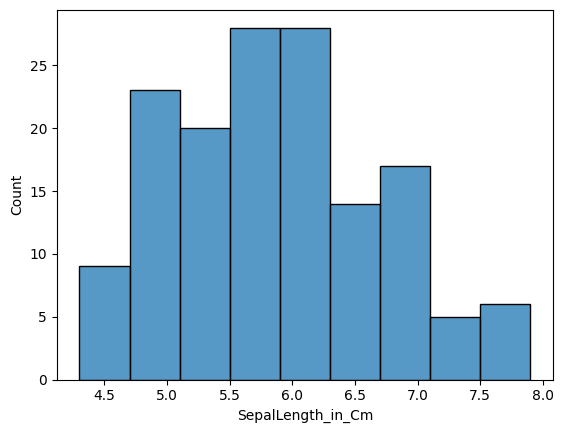

In [ ]:
sns.histplot(data=irisData, x = irisData["SepalLength_in_Cm"])

<Axes: xlabel='SepalWidth_in_Cm', ylabel='Count'>

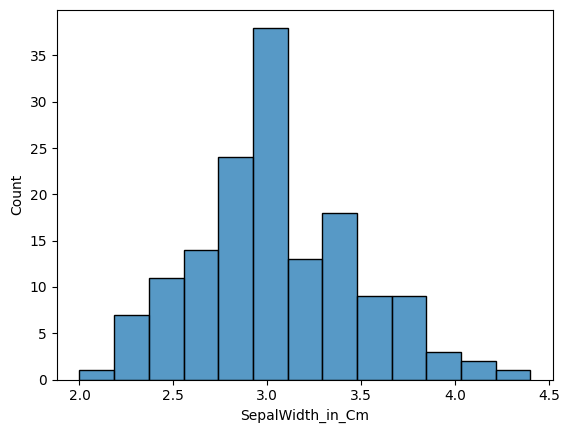

In [ ]:
sns.histplot(data=irisData, x = irisData["SepalWidth_in_Cm"])

<Axes: xlabel='PetalLength_in_Cm', ylabel='Count'>

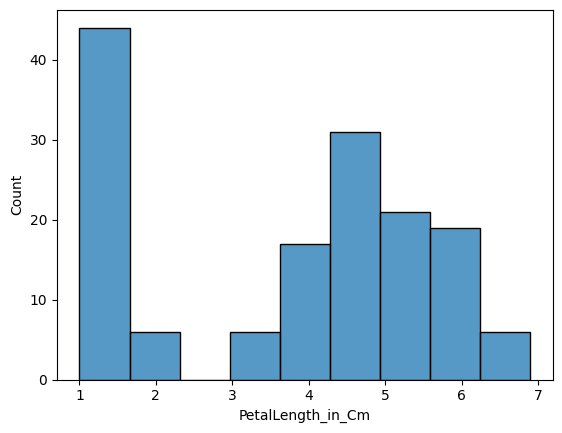

In [ ]:
sns.histplot(data=irisData, x = irisData["PetalLength_in_Cm"])

<Axes: xlabel='PetalWidth_in_Cm', ylabel='Count'>

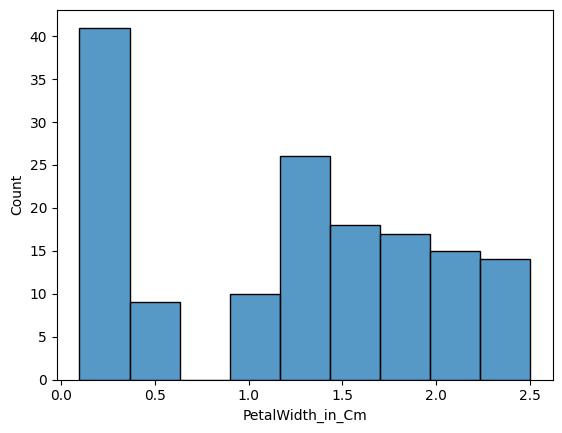

In [ ]:
sns.histplot(data=irisData, x = irisData["PetalWidth_in_Cm"])

<Axes: xlabel='PetalLength_in_Cm'>

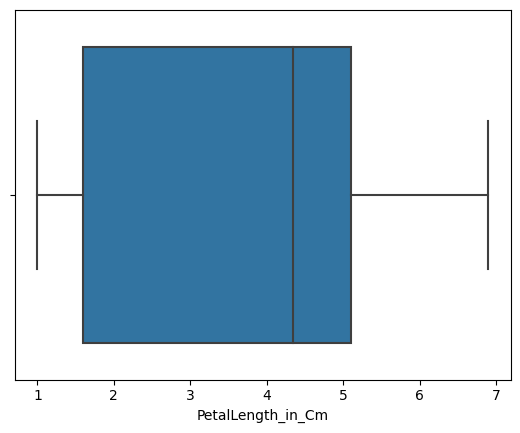

In [ ]:
sns.boxplot(data=irisData, x = irisData["PetalLength_in_Cm"])

<Axes: xlabel='PetalWidth_in_Cm'>

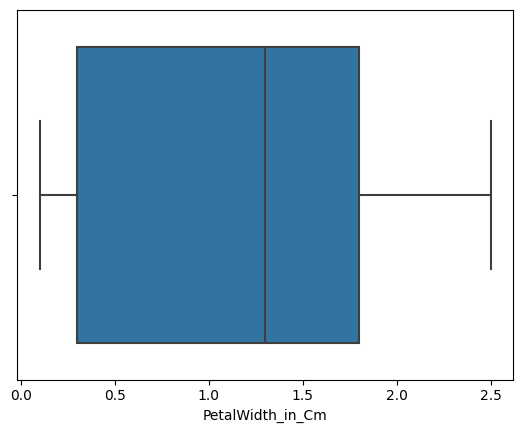

In [ ]:
sns.boxplot(data=irisData, x = irisData["PetalWidth_in_Cm"])

<Axes: xlabel='SepalLength_in_Cm'>

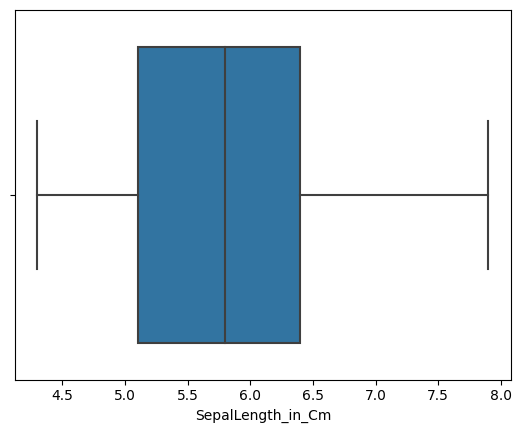

In [ ]:
sns.boxplot(data=irisData, x = irisData["SepalLength_in_Cm"])

<Axes: xlabel='SepalWidth_in_Cm'>

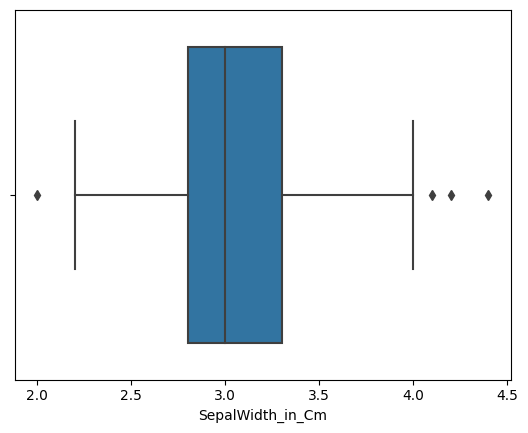

In [ ]:
sns.boxplot(data=irisData, x = irisData["SepalWidth_in_Cm"])

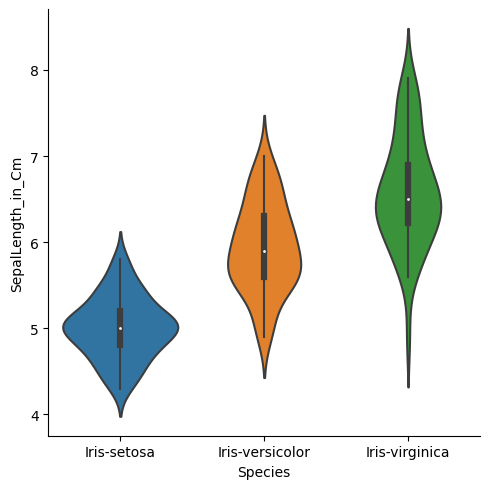

In [ ]:
sns.catplot(data=irisData, x="Species", y="SepalLength_in_Cm",kind = "violin")

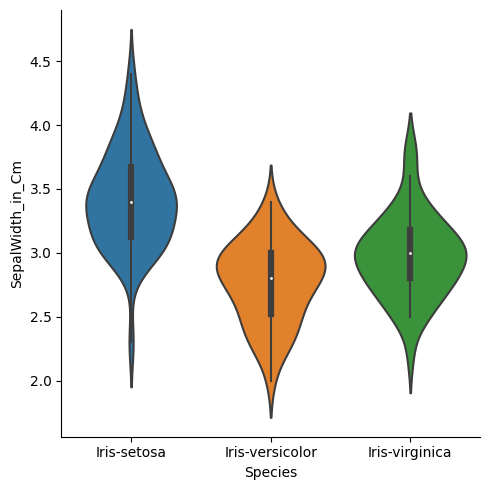

In [ ]:
sns.catplot(data=irisData, x="Species", y="SepalWidth_in_Cm",kind = "violin")

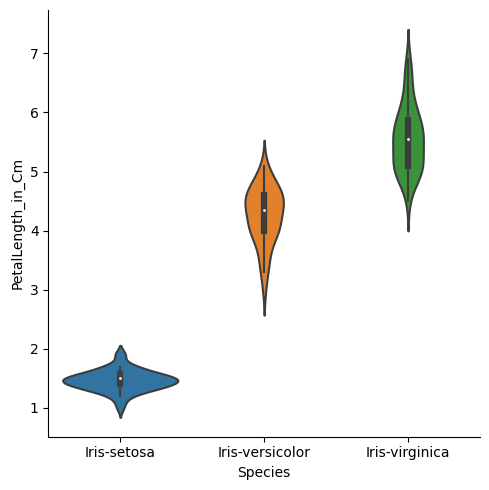

In [ ]:
sns.catplot(data=irisData, x="Species", y="PetalLength_in_Cm",kind = "violin")

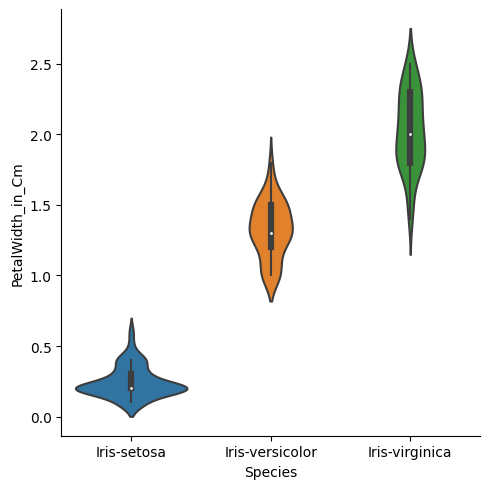

In [ ]:
sns.catplot(data=irisData, x="Species", y="PetalWidth_in_Cm",kind = "violin")

### Splitting Dataset

In [ ]:
featureColumns = ["SepalLength_in_Cm", "SepalWidth_in_Cm", "PetalLength_in_Cm", "PetalWidth_in_Cm"]

In [ ]:
X = irisData[featureColumns]

In [ ]:
y = irisData["Species"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, y_train.shape

((105, 4), (105,))

In [ ]:
X_test.shape, y_test.shape

((45, 4), (45,))

### Accuracy, Classification Matrix, Confusion Matrix

In [ ]:
def metrics(predictions):
    accuracy = accuracy_score(y_test,predictions)
    classificationReport = classification_report(y_test,predictions)
    confusionMatrix = confusion_matrix(y_test,predictions)
    print(f"Accuracy: {accuracy}")
    print(f"\nClassification Report: {classificationReport}")
    print(f"\nConfusion Matrix: {confusionMatrix}")

### Model Training

#### KNN

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
predictions = knn_model.predict(X_test)

In [ ]:
metrics(predictions)

Accuracy: 0.9777777777777777

Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45


Confusion Matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


#### Logistic Regression

In [ ]:
LR_model = LogisticRegression()

In [ ]:
LR_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LR_predictions = LR_model.predict(X_test)

In [ ]:
metrics(LR_predictions)

Accuracy: 0.9777777777777777

Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45


Confusion Matrix: [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


#### Naive Bayes

In [ ]:
NB_model = GaussianNB()

In [ ]:
NB_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
NB_predictions = NB_model.predict(X_test)

In [ ]:
metrics(NB_predictions)

Accuracy: 1.0

Classification Report:                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45


Confusion Matrix: [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
